In [3]:
!pip install labelme tensorflow-gpu==2.10 opencv-python matplotlib albumentations sklearn

### Sort out right images

In [1]:
with open('Data/HandInfo.txt') as file:
    while True:
        line = file.readline()
        if not line:
            break
        if "palmar left" or "palmar right" in line:
            print(line)

id,age,gender,skinColor,accessories,nailPolish,aspectOfHand,imageName,irregularities

0000000,27,male,fair,0,0,dorsal right,Hand_0000002.jpg,0

0000000,27,male,fair,0,0,dorsal right,Hand_0000003.jpg,0

0000000,27,male,fair,0,0,dorsal right,Hand_0000004.jpg,0

0000000,27,male,fair,0,0,dorsal right,Hand_0000005.jpg,0

0000000,27,male,fair,0,0,dorsal right,Hand_0000006.jpg,0

0000000,27,male,fair,0,0,dorsal right,Hand_0000007.jpg,0

0000000,27,male,fair,0,0,dorsal right,Hand_0000008.jpg,0

0000000,27,male,fair,0,0,dorsal right,Hand_0000009.jpg,0

0000000,27,male,fair,0,0,dorsal right,Hand_0000010.jpg,0

0000000,27,male,fair,0,0,dorsal right,Hand_0000011.jpg,0

0000000,27,male,fair,0,0,dorsal right,Hand_0000012.jpg,0

0000000,27,male,fair,0,0,dorsal right,Hand_0000013.jpg,0

0000000,27,male,fair,0,0,dorsal right,Hand_0000014.jpg,0

0000000,27,male,fair,0,0,dorsal right,Hand_0000015.jpg,0

0000000,27,male,fair,0,0,dorsal right,Hand_0000016.jpg,0

0000000,27,male,fair,0,0,dorsal right,Hand_0

In [40]:
import re
import os

search_word1 = "palmar left" 
search_word2 = "palmar right" 
with open('Data/HandInfo.txt', 'r') as file:
    for line_number, line in enumerate(file, 1):
        if search_word1 in line:
            match = re.findall(r'Hand_\d+\.jpg', line)
            match = match[0]
            os.rename(f'Data/Images/{match}', f'Data/Palm_Img/{match}')
        if search_word2 in line:
            match = re.findall(r'Hand_\d+\.jpg', line)
            match = match[0]
            os.rename(f'Data/Images/{match}', f'Data/Palm_Img/{match}')

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'Data/Images/Hand_0000038.jpg' -> 'Data/Palm_Img/Hand_0000038.jpg'

### Import and Label data

In [1]:
import os, random, shutil

i = 0
while i < 20:
    file = random.choice(os.listdir('Data/zpast/Palm_Img'))
    source = os.path.join('Data/zpast/Palm_Img', file)
    shutil.copy(source, 'Data/Val_Img/')
    i += 1


In [3]:
!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\FRANC\.labelmerc


### Set GPU

In [1]:
import tensorflow as tf

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Visulise Images and Labels

In [5]:
test_img_names = tf.data.Dataset.list_files('Data\\Test_Img\\*.jpg', shuffle=False)

In [6]:
test_img_names.as_numpy_iterator().next()

b'Data\\Test_Img\\Hand_0000125.jpg'

In [16]:
def load_img(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [8]:
test_images = test_img_names.map(load_img)

In [9]:
test_images.as_numpy_iterator().next().shape

(1200, 1600, 3)

In [12]:
from matplotlib import pyplot as plt
import cv2
import json
import os
import numpy as np

In [11]:
def showImage(image):
    with open(os.path.join('Data', 'Test_Labels', f'{image}.json'), 'r') as f:
        label = json.load(f)

    path = f'Data/Test_Img/{image}.jpg'
    image = cv2.imread(path)

    lines = [None, None, None]

    lines[0] = label['shapes'][0]['points']
    lines[1] = label['shapes'][1]['points']
    lines[2] = label['shapes'][2]['points']

    lines = np.array(lines).astype(int)

    image = cv2.line(image, lines[0][0], lines[0][1], (0, 255, 0), 9)
    image = cv2.line(image, lines[0][1], lines[0][2], (0, 255, 0), 9)
    image = cv2.line(image, lines[0][2], lines[0][3], (0, 255, 0), 9)
    
    image = cv2.line(image, lines[1][0], lines[1][1], (0, 0, 255), 9)
    image = cv2.line(image, lines[1][1], lines[1][2], (0, 0, 255), 9)
    image = cv2.line(image, lines[1][2], lines[1][3], (0, 0, 255), 9)

    image = cv2.line(image, lines[2][0], lines[2][1], (255, 0, 0), 9)
    image = cv2.line(image, lines[2][1], lines[2][2], (255, 0, 0), 9)
    image = cv2.line(image, lines[2][2], lines[2][3], (255, 0, 0), 9)

    plt.imshow(image)

In [33]:
def showImg(image, label=None, line1=None, line2=None, line3=None, width=3):

    if label != None:
    
        lines = np.array(label).astype(int)

        image = cv2.line(image, lines[0], lines[1], (0, 255, 0), width)
        image = cv2.line(image, lines[1], lines[2], (0, 255, 0), width)
        image = cv2.line(image, lines[2], lines[3], (0, 255, 0), width)
    
        image = cv2.line(image, lines[4], lines[5], (0, 0, 255), width)
        image = cv2.line(image, lines[5], lines[6], (0, 0, 255), width)
        image = cv2.line(image, lines[6], lines[7], (0, 0, 255), width)

        image = cv2.line(image, lines[8], lines[9], (255, 0, 0), width)
        image = cv2.line(image, lines[9], lines[10], (255, 0, 0), width)
        image = cv2.line(image, lines[10], lines[11], (255, 0, 0), width)
        
    if line1 != None:
        
        line = np.array(line1).astype(int)
        
        image = cv2.line(image, line[0], line[1], (0, 255, 0), width)
        image = cv2.line(image, line[1], line[2], (0, 255, 0), width)
        image = cv2.line(image, line[2], line[3], (0, 255, 0), width)
        
    if line2 != None:
        
        line = np.array(line2).astype(int)
        
        image = cv2.line(image, line[0], line[1], (0, 255, 0), width)
        image = cv2.line(image, line[1], line[2], (0, 255, 0), width)
        image = cv2.line(image, line[2], line[3], (0, 255, 0), width)
    
    if line3 != None:
        
        line = np.array(line3).astype(int)
        
        image = cv2.line(image, line[0], line[1], (0, 255, 0), width)
        image = cv2.line(image, line[1], line[2], (0, 255, 0), width)
        image = cv2.line(image, line[2], line[3], (0, 255, 0), width)

    return image

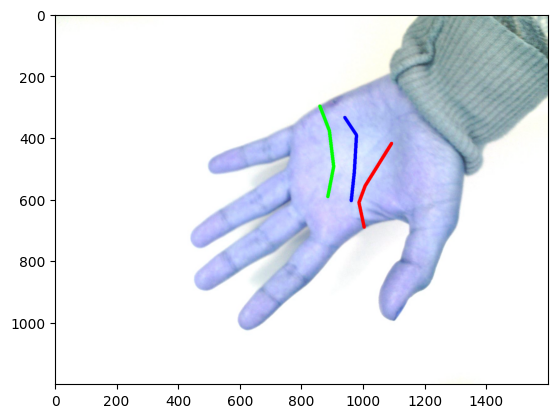

In [13]:
showImage('Hand_0000425')

In [14]:
with open(os.path.join('Data', 'Test_Labels', 'Hand_0000707.json'), 'r') as f:
    label = json.load(f)

In [15]:
lines = [None, None, None]
lines[0] = label['shapes'][0]['points']
lines[1] = label['shapes'][1]['points']
lines[2] = label['shapes'][2]['points']
lines = np.array(lines)
lines.shape

(3, 4, 2)

### Make Images ready for Albumentations

In [79]:
import albumentations as alb

augmentor = alb.Compose([alb.Resize(375, 500, interpolation=1, always_apply=True, p=1),
                         alb.RandomCrop(width=480, height=370),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.4),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.3),
                         alb.VerticalFlip(p=0.5)],
                         keypoint_params=alb.KeypointParams(format='xy', 
                                                          remove_invisible=False))

In [78]:
lines

[[640.1408450704225, 501.40845070422534],
 [710.5633802816901, 560.5633802816901],
 [824.6478873239437, 592.9577464788732],
 [959.8591549295775, 590.1408450704225],
 [927.4647887323945, 692.9577464788732],
 [758.4507042253522, 628.169014084507],
 [627.4647887323945, 609.8591549295775],
 [600.7042253521126, 608.4507042253521],
 [826.056338028169, 815.4929577464789],
 [740.1408450704225, 701.4084507042254],
 [631.6901408450703, 623.943661971831],
 [557.0422535211267, 600.0]]

In [19]:
lines_re = np.reshape(lines, (12, 2), order='C')
lines_re

array([[1419.01408451,   71.83098592],
       [1311.97183099,  181.69014085],
       [1224.64788732,  376.05633803],
       [1220.42253521,  580.28169014],
       [1100.70422535,  195.77464789],
       [1141.54929577,  323.94366197],
       [1175.35211268,  407.04225352],
       [1183.8028169 ,  516.90140845],
       [ 983.8028169 ,  184.50704225],
       [1059.85915493,  314.08450704],
       [1085.21126761,  421.12676056],
       [1059.85915493,  501.4084507 ]])

In [20]:
transformed = augmentor(image=image, keypoints=lines_re)

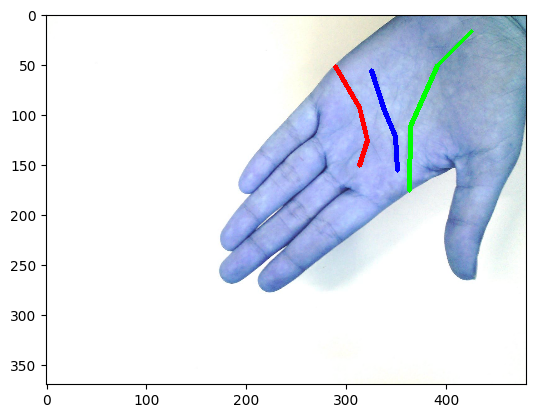

In [21]:
transformed_image = transformed['image']
transformed_keypoints = transformed['keypoints']

showImg(transformed_image, label=transformed_keypoints, width=3)

### Make Augummentaions Pipeline

In [74]:
import os , cv2, json

In [81]:
for image in os.listdir(os.path.join('Data', 'Val_Img')):
        img = cv2.imread(os.path.join('Data', 'Val_Img', image))

        lines = [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
        labels = ['None', 'None', 'None']
        label_path = os.path.join('Data', 'Val_Labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
                
            lines[0] = label['shapes'][0]['points'][0]
            lines[1] = label['shapes'][0]['points'][1]
            lines[2] = label['shapes'][0]['points'][2]
            lines[3] = label['shapes'][0]['points'][3]
            lines[4] = label['shapes'][1]['points'][0]
            lines[5] = label['shapes'][1]['points'][1]
            lines[6] = label['shapes'][1]['points'][2]
            lines[7] = label['shapes'][1]['points'][3]
            lines[8] = label['shapes'][2]['points'][0]
            lines[9] = label['shapes'][2]['points'][1]
            lines[10] = label['shapes'][2]['points'][2]
            lines[11] = label['shapes'][2]['points'][3]
            
            labels[0] = label['shapes'][0]['label']
            labels[1] = label['shapes'][1]['label']
            labels[2] = label['shapes'][2]['label']

        try: 
            for x in range(60):
                augmented = augmentor(image=img, keypoints=lines)
                cv2.imwrite(os.path.join('Data', 'Val_Img', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image
                annotation['labels'] = labels
                

                if os.path.exists(label_path):
                    if len(augmented['keypoints']) == 0: 
                        annotation['keypoints'] = [[0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5]]
                        annotation['class'] = 0 
                    else: 
                        annotation['keypoints'] = augmented['keypoints']
                        annotation['class'] = 1 
                else: 
                    annotation['keypoints'] = [[0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5]]
                    annotation['class'] = 0 


                with open(os.path.join('Data', 'Val_Labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

KeyboardInterrupt: 

In [14]:
img = cv2.imread(os.path.join('Data', 'Arg_Img', 'Hand_0000125.22.jpg'))
with open(os.path.join('Data', 'Arg_Labels', 'Hand_0000125.22.json'), 'r') as f:
    label = json.load(f)

img.shape, np.array(label['keypoints']).shape, label['class'], label['labels']

((370, 480, 3), (12, 2), 1, ['love', 'wisdom', 'life'])

### Make a Data-Set for Love, Life and Wise represetatily

In [82]:
for label_name in os.listdir(os.path.join('Data', 'Arg_Labels')):
    label_path = os.path.join('Data', 'Arg_Labels', label_name)
    with open(label_path, 'r') as f:
        label = json.load(f)
    
    Life_annotation = {}
    Love_annotation = {}
    Wise_annotation = {}
    
    Life_annotation['image'] = f'{label_name.split(".")[0]}.{label_name.split(".")[1]}.jpg'
    Love_annotation['image'] = f'{label_name.split(".")[0]}.{label_name.split(".")[1]}.jpg'
    Wise_annotation['image'] = f'{label_name.split(".")[0]}.{label_name.split(".")[1]}.jpg'
    
    Life_annotation['class'] = label['class']
    Love_annotation['class'] = label['class']
    Wise_annotation['class'] = label['class']
    
    Life_annotation['keypoints'] =  [[0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5]]
    Love_annotation['keypoints'] =  [[0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5]]
    Wise_annotation['keypoints'] =  [[0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5]]
    
    i = 0
    for tpe in label['labels']:
        if tpe == 'love':
            if i == 0:
                Love_annotation['keypoints'] = label['keypoints'][:4]
            if i == 1:
                Love_annotation['keypoints'] = label['keypoints'][4:8]
            if i == 2:
                Love_annotation['keypoints'] = label['keypoints'][8:]
        if tpe == 'life':
            if i == 0:
                Life_annotation['keypoints'] = label['keypoints'][:4]
            if i == 1:
                Life_annotation['keypoints'] = label['keypoints'][4:8]
            if i == 2:
                Life_annotation['keypoints'] = label['keypoints'][8:]
                
        if tpe == 'wisdom':
            if i == 0:
                Wise_annotation['keypoints'] = label['keypoints'][:4]
            if i == 1:
                Wise_annotation['keypoints'] = label['keypoints'][4:8]
            if i == 2:
                Wise_annotation['keypoints'] = label['keypoints'][8:]

        i += 1
    
    print(Life_annotation)
    print(Love_annotation)
    print(Wise_annotation)
    
    with open(os.path.join('Data', 'Life_Labels', f'Life_{label_name}'), 'w') as f:
                    json.dump(Life_annotation, f)
            
    with open(os.path.join('Data', 'Love_Labels', f'Love_{label_name}'), 'w') as f:
                    json.dump(Love_annotation, f)
    
    with open(os.path.join('Data', 'Wise_Labels', f'Wise_{label_name}'), 'w') as f:
                    json.dump(Wise_annotation, f)
    

{'image': 'Hand_0000040.0.jpg', 'class': 1, 'keypoints': [[139.43133802816897, 289.7746478873239], [175.08274647887322, 302.9788732394366], [194.44894366197178, 327.6267605633803], [198.41021126760563, 360.19718309859155]]}
{'image': 'Hand_0000040.0.jpg', 'class': 1, 'keypoints': [[300.0827464788732, 316.6232394366197], [282.0369718309859, 318.3838028169014], [224.37852112676057, 300.3380281690141], [203.6919014084507, 297.25704225352115]]}
{'image': 'Hand_0000040.0.jpg', 'class': 1, 'keypoints': [[272.52678571428567, 358.2113095238095], [242.76488095238096, 332.5416666666667], [216.35119047619048, 310.2202380952381], [205.9345238095238, 304.2678571428571]]}
{'image': 'Hand_0000040.1.jpg', 'class': 1, 'keypoints': [[157.43133802816897, 74.22535211267606], [193.08274647887322, 61.02112676056339], [212.44894366197178, 36.37323943661972], [216.41021126760563, 3.802816901408452]]}
{'image': 'Hand_0000040.1.jpg', 'class': 1, 'keypoints': [[318.0827464788732, 47.37676056338029], [300.0369718

[[172 308]
 [143 273]
 [119 230]
 [101 227]]


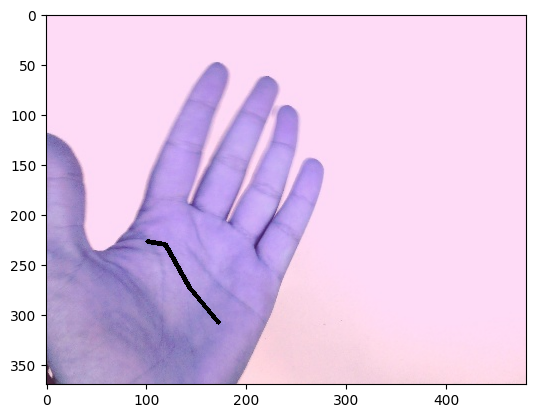

In [145]:
img = cv2.imread(os.path.join('Data', 'Arg_Img', 'Hand_0000125.0.jpg'))
label_path = os.path.join('Data', 'Wise_Labels', 'Wise_Hand_0000125.0.json')
with open(label_path, 'r') as f:
    label = json.load(f)
    
lines = np.array(label['keypoints']).astype(int)

print(lines)

width = 3

img = cv2.line(img, lines[0], lines[1], 0, width)
img = cv2.line(img, lines[1], lines[2], 0, width)
img = cv2.line(img, lines[2], lines[3], 0, width)

plt.imshow(img)

### Build Tensorflow Dataset

In [186]:
import tensorflow as tf
import numpy as np
import json
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import cv2

In [187]:
def load_img(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [188]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r') as f:
        label = json.load(f)
    
    return [label['class']], label['keypoints']

In [189]:
def normalize(x, y):
    y_normalized = tf.map_fn(lambda point: tf.stack([
        tf.math.divide(tf.cast(point[0], tf.float32), 480.0),
        tf.math.divide(tf.cast(point[1], tf.float32), 370.0)
    ]), y)
    return x, y_normalized

In [190]:
images = tf.data.Dataset.list_files('Data\\Arg_Img\\*.jpg', shuffle=False)
life_labels = tf.data.Dataset.list_files('Data\\Life_Labels\\*.json', shuffle=False)
love_labels = tf.data.Dataset.list_files('Data\\Love_Labels\\*.json', shuffle=False)
wise_labels = tf.data.Dataset.list_files('Data\\Wise_Labels\\*.json', shuffle=False)

images = images.map(load_img)
images = images.map(lambda x: x/255)
images = images.map(lambda x: tf.tensordot(tf.cast(x[...,:3], tf.float32), [1/3, 1/3, 1/3], axes=1))
images = images.map(lambda x: tf.reshape(x, (370, 480, 1)))

life_labels = life_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float32]))
love_labels = love_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float32]))
wise_labels = wise_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float32]))

life_labels = life_labels.map(normalize)
love_labels = love_labels.map(normalize)
wise_labels = wise_labels.map(normalize)

life_labels = life_labels.map(lambda x, y: (x, tf.reshape(y, [-1])))
love_labels = love_labels.map(lambda x, y: (x, tf.reshape(y, [-1])))
wise_labels = wise_labels.map(lambda x, y: (x, tf.reshape(y, [-1])))

In [191]:
val_images = tf.data.Dataset.list_files('Data\\Val_Img\\*.jpg', shuffle=False)
Life_Val_Labels = tf.data.Dataset.list_files('Data\\Life_Val_Labels\\*.json', shuffle=False)
Love_Val_Labels = tf.data.Dataset.list_files('Data\\Love_Val_Labels\\*.json', shuffle=False)
Wise_Val_Labels = tf.data.Dataset.list_files('Data\\Wise_Val_Labels\\*.json', shuffle=False)

val_images = val_images.map(load_img)
val_images = val_images.map(lambda x: x/255)
val_images = val_images.map(lambda x: tf.tensordot(tf.cast(x[...,:3], tf.float32), [1/3, 1/3, 1/3], axes=1))
val_images = val_images.map(lambda x: tf.reshape(x, (370, 480, 1)))

Life_Val_Labels = Life_Val_Labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float32]))
Love_Val_Labels = Love_Val_Labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float32]))
Wise_Val_Labels = Wise_Val_Labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float32]))

Life_Val_Labels = Life_Val_Labels.map(normalize)
Love_Val_Labels = Love_Val_Labels.map(normalize)
Wise_Val_Labels = Wise_Val_Labels.map(normalize)

Life_Val_Labels = Life_Val_Labels.map(lambda x, y: (x, tf.reshape(y, [-1])))
Love_Val_Labels = Love_Val_Labels.map(lambda x, y: (x, tf.reshape(y, [-1])))
Wise_Val_Labels = Wise_Val_Labels.map(lambda x, y: (x, tf.reshape(y, [-1])))

In [61]:
list(images)[0].shape, list(val_images)[0].shape

(TensorShape([370, 480, 1]), TensorShape([370, 480, 1]))

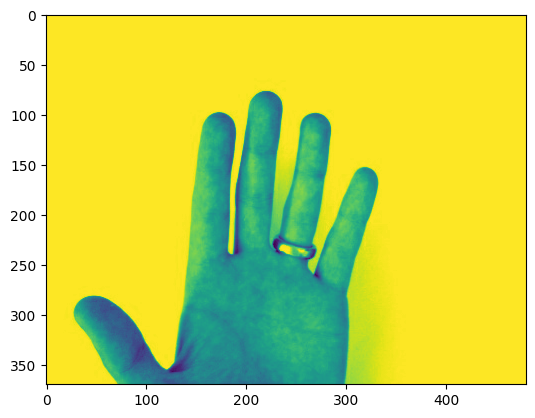

In [24]:
plt.imshow(list(images)[0])

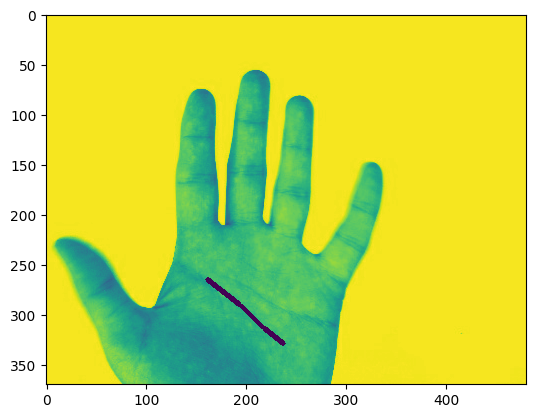

In [65]:
img = np.array(list(val_images)[12])
coords = list(Wise_Val_Labels)[12][1]

coords = tf.stack([
    coords[0] * 480,
    coords[1] * 370,
    coords[2] * 480,
    coords[3] * 370,
    coords[4] * 480,
    coords[5] * 370,
    coords[6] * 480,
    coords[7] * 370
])
    
lines = np.array(coords).astype(int)

width = 3

img = cv2.line(img, (lines[0], lines[1]), (lines[2], lines[3]), 0, width)
img = cv2.line(img, (lines[2], lines[3]), (lines[4], lines[5]), 0, width)
img = cv2.line(img, (lines[4], lines[5]), (lines[6], lines[7]), 0, width)
plt.imshow(img)

In [28]:
len(images), len(life_labels), len(love_labels), len(wise_labels)

(9000, 9000, 9000, 9000)

In [192]:
life_train = tf.data.Dataset.zip((images, life_labels))
love_train = tf.data.Dataset.zip((images, love_labels))
wise_train = tf.data.Dataset.zip((images, wise_labels))
                            
life_train = life_train.shuffle(4000)
love_train = love_train.shuffle(4000)
wise_train = wise_train.shuffle(4000)
                                 
life_train = life_train.batch(4)
love_train = love_train.batch(4)
wise_train = wise_train.batch(4)
                                 
life_train = life_train.prefetch(4)
love_train = love_train.prefetch(4)
wise_train = wise_train.prefetch(4)

In [193]:
life_val = tf.data.Dataset.zip((val_images, Life_Val_Labels))
love_val = tf.data.Dataset.zip((val_images, Love_Val_Labels))
wise_val = tf.data.Dataset.zip((val_images, Wise_Val_Labels))
                            
life_val = life_val.shuffle(4000)
love_val = love_val.shuffle(4000)
wise_val = wise_val.shuffle(4000)
                                 
life_val = life_val.batch(4)
love_val = love_val.batch(4)
wise_val = wise_val.batch(4)
                                 
life_val = life_val.prefetch(4)
love_val = love_val.prefetch(4)
wise_val = wise_val.prefetch(4)

### View Images and Annotations

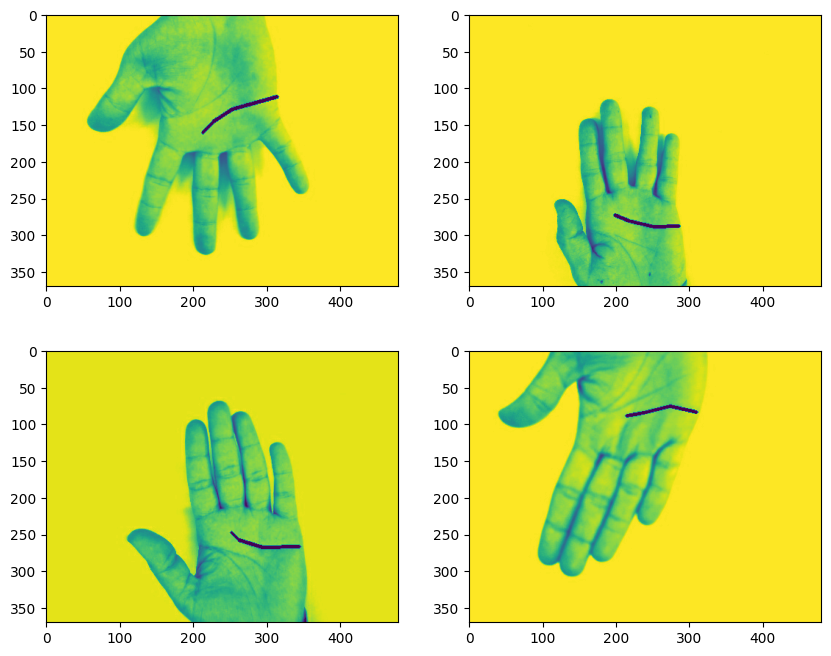

In [67]:
love = love_val.as_numpy_iterator().next()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for idx in range(4):
    image = love[0][idx]
    sample_coords = love[1][1][idx]
    
    coords = tf.stack([
        sample_coords[0] * 480,
        sample_coords[1] * 370,
        sample_coords[2] * 480,
        sample_coords[3] * 370,
        sample_coords[4] * 480,
        sample_coords[5] * 370,
        sample_coords[6] * 480,
        sample_coords[7] * 370
    ])
    
    lines = np.array(coords).astype(int)
    width = 3

    image = cv2.line(image, (lines[0], lines[1]), (lines[2], lines[3]), 0, width)
    image = cv2.line(image, (lines[2], lines[3]), (lines[4], lines[5]), 0, width)
    image = cv2.line(image, (lines[4], lines[5]), (lines[6], lines[7]), 0, width)
    

    ax[idx // 2, idx % 2].imshow(image)
    

### Build Models

In [194]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D, MaxPool2D, Flatten
import graphviz
import pydot
from tensorflow.keras.utils import plot_model

In [195]:
def build_Model2():
    input_layer = Input(shape=(370, 480, 1))
    
    conv1 = Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu")(input_layer)
    conv2 = Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu")(conv1)
    
    maxpool1 = MaxPool2D(pool_size=(2,2), strides=(2,2))(conv2)
    
    conv3 = Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu")(maxpool1)
    conv4 = Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu")(conv3)
    
    # Classification Model
    f1 = GlobalMaxPooling2D()(conv4)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(conv4)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(512, activation='relu')(regress1)
    regress3 = Dense(128, activation='relu')(regress1)
    regress4 = Dense(8, activation='sigmoid')(regress3)
    
    handtracker = Model(inputs=input_layer, outputs=[class2, regress4])
    return handtracker

In [196]:
def build_Model():
    input_layer = Input(shape=(370, 480, 1))
    
    conv1 = Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu")(input_layer)
    maxpool1 = MaxPool2D(pool_size=(2,2), strides=(2,2))(conv1)
    conv2 = Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu")(maxpool1)
    maxpool2 = MaxPool2D(pool_size=(2,2), strides=(2,2))(conv2)
    conv3 = Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu")(maxpool2)
    
    # Classification Model
    f1 = GlobalMaxPooling2D()(conv3)
    class1 = Dense(256, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(conv3)
    regress1 = Dense(512, activation='relu')(f2)
    regress2 = Dense(128, activation='relu')(regress1)
    regress3 = Dense(8, activation='relu')(regress2)
    
    handtracker = Model(inputs=input_layer, outputs=[class2, regress3])
    return handtracker

In [197]:
lovereader = build_Model()
lifereader = build_Model()
wisereader = build_Model()

In [113]:
lovereader.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 370, 480, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_36 (Conv2D)             (None, 370, 480, 32  320         ['input_10[0][0]']               
                                )                                                                 
                                                                                                  
 max_pooling2d_9 (MaxPooling2D)  (None, 185, 240, 32  0          ['conv2d_36[0][0]']              
                                )                                                           

### Make a Test

In [98]:
x, y = life_train.as_numpy_iterator().next()

In [99]:
x.shape, y[0].shape, y[1].shape

((4, 370, 480, 1), (4, 1), (4, 8))

In [100]:
love_class, love_coord = lovereader.predict(x)
life_class, life_coord = lifereader.predict(x)
wise_class, wise_coord = wisereader.predict(x)

1/1 [==============================] - 0s 87ms/step


In [101]:
y

(array([[1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.58673346, 1.0072421 , 0.5922352 , 0.8882851 , 0.63991714,
         0.7633803 , 0.73528093, 0.6777312 ],
        [0.25788218, 0.4933479 , 0.29089275, 0.62063193, 0.28172314,
         0.73126185, 0.22212075, 0.8561667 ],
        [0.6411715 , 0.3722307 , 0.58890474, 0.3127522 , 0.583403  ,
         0.17476209, 0.60724396, 0.09387134],
        [0.66709584, 0.81918544, 0.59190506, 0.85130376, 0.5533927 ,
         0.93338406, 0.5497249 , 0.99524176]], dtype=float32))

In [102]:
love_class, love_coord

(array([[0.50422347],
        [0.50306594],
        [0.5042154 ],
        [0.50415784]], dtype=float32),
 array([[0.503933  , 0.497288  , 0.50236577, 0.49450076, 0.4983282 ,
         0.5025585 , 0.49899268, 0.4941675 ],
        [0.50336784, 0.49773544, 0.5020964 , 0.49544668, 0.49845612,
         0.50246686, 0.49909917, 0.4953678 ],
        [0.50384015, 0.49730876, 0.50243706, 0.49443898, 0.4983005 ,
         0.50276136, 0.499092  , 0.4941288 ],
        [0.50378865, 0.4972923 , 0.5025159 , 0.4944557 , 0.49823266,
         0.5027629 , 0.4991066 , 0.49410805]], dtype=float32))

tf.Tensor(
[241.88784599 183.99655581 241.13556862 182.96527982 239.19754028
 185.94665587 239.51648712 182.84197748], shape=(8,), dtype=float64)


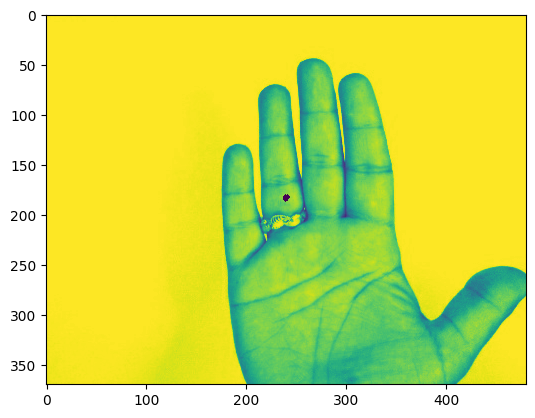

In [103]:
img = np.array(x[0])

coords = love_coord[0]

coords = tf.stack([
    coords[0] * 480,
    coords[1] * 370,
    coords[2] * 480,
    coords[3] * 370,
    coords[4] * 480,
    coords[5] * 370,
    coords[6] * 480,
    coords[7] * 370
])
    
lines = np.array(coords).astype(int)

width = 3
print(coords)

img = cv2.line(img, (lines[0], lines[1]), (lines[2], lines[3]), 0, width)
img = cv2.line(img, (lines[2], lines[3]), (lines[4], lines[5]), 0, width)
img = cv2.line(img, (lines[4], lines[5]), (lines[6], lines[7]), 0, width)
plt.imshow(img)

### Losses and Optimizers

In [198]:
len(love_train)

2250

In [199]:
batches_per_epoch = len(love_train)
lr_decay = (1. / 3.) / batches_per_epoch

In [200]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [203]:
def localization_loss(y_true, y_pred):
    delta_coord = tf.reduce_sum(tf.square(y_true[:, :2] - y_pred[:, :2]))
    
    h_true = y_true[:, 3] - y_true[:, 1]
    w_true = y_true[:, 2] - y_true[:, 0]
    
    h_pred = y_pred[:, 3] - y_pred[:, 1]
    w_pred = y_pred[:, 2] - y_pred[:, 0]
    
    delta_size1 = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))
    
    h_true = y_true[:, 5] - y_true[:, 3]
    w_true = y_true[:, 4] - y_true[:, 2]
    
    h_pred = y_pred[:, 5] - y_pred[:, 3]
    w_pred = y_pred[:, 4] - y_pred[:, 2]
    
    delta_size2 = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))
    
    h_true = y_true[:, 7] - y_true[:, 5]
    w_true = y_true[:, 6] - y_true[:, 4]
    
    h_pred = y_pred[:, 7] - y_pred[:, 5]
    w_pred = y_pred[:, 6] - y_pred[:, 4]
    
    delta_size3 = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))
    
    return 2 * delta_coord + delta_size1 + delta_size2 + delta_size3

In [204]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### Test Loss

In [109]:
localization_loss(y[1], love_coord).numpy()

0.64184684

In [110]:
classloss(y[0], love_class).numpy()

0.6853466

### Custom Model Class

In [205]:
class HandTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

### Train LoveReader

In [206]:
model = HandTracker(lovereader)

In [207]:
model.compile(opt, classloss, regressloss)

In [208]:
logdir='logs'

In [222]:
tensorflow_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [227]:
hist = model.fit(love_train, epochs=40, validation_data=love_val, callbacks=[tensorflow_callback])

Epoch 1/40
2250/2250 [==============================] - 93s 39ms/step - total_loss: 1.0486 - class_loss: 0.0336 - regress_loss: 1.0319 - val_total_loss: 3.9541 - val_class_loss: 0.9269 - val_regress_loss: 3.4907
Epoch 2/40
2250/2250 [==============================] - 96s 41ms/step - total_loss: 1.0246 - class_loss: 0.0238 - regress_loss: 1.0127 - val_total_loss: 1.5447 - val_class_loss: 0.0326 - val_regress_loss: 1.5284
Epoch 3/40
2250/2250 [==============================] - 96s 41ms/step - total_loss: 1.0101 - class_loss: 0.0180 - regress_loss: 1.0011 - val_total_loss: 1.4784 - val_class_loss: 0.3505 - val_regress_loss: 1.3032
Epoch 4/40
2250/2250 [==============================] - 97s 41ms/step - total_loss: 0.9994 - class_loss: 0.0131 - regress_loss: 0.9928 - val_total_loss: 1.4796 - val_class_loss: 0.5676 - val_regress_loss: 1.1958
Epoch 5/40
2250/2250 [==============================] - 98s 41ms/step - total_loss: 0.9916 - class_loss: 0.0102 - regress_loss: 0.9865 - val_total_loss:

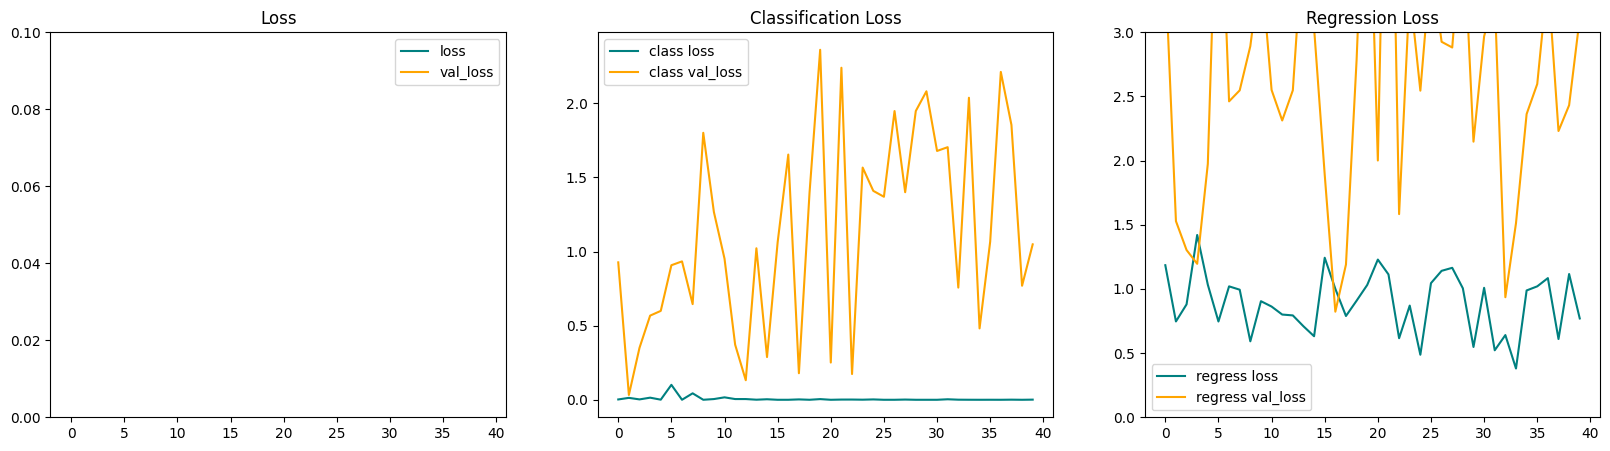

In [229]:
fig, ax = plt.subplots(ncols=3, figsize=(20, 5))

ax[0].set_ylim([0, 0.1])
ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val_loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[2].set_ylim([0, 0.1])
ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='class val_loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].set_ylim([0, 3])
ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='regress val_loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [230]:
lovereader.save('Models/lovereader7.h5')

### Test LoveReader

In [232]:
from keras.models import load_model
model = load_model('Models/lovereader7.h5')

In [233]:
test = love_val.as_numpy_iterator().next()

In [234]:
test[0].shape

(4, 370, 480, 1)

In [235]:
y_pred = model.predict(test[0])

1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 18ms/step


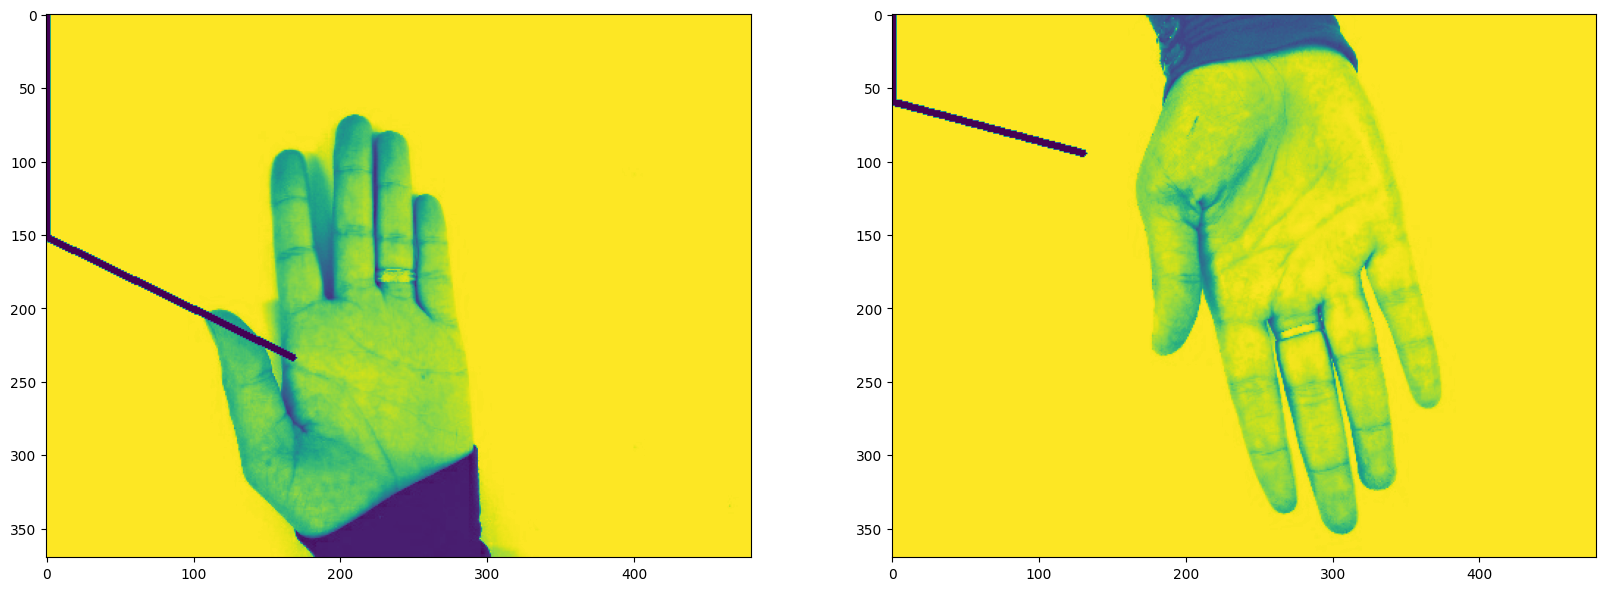

In [247]:
test = love_val.as_numpy_iterator().next()
test[0].shape
y_pred = model.predict(test[0])

fig, ax = plt.subplots(ncols=2, figsize=(20, 8))
for idx in range(2):
    image = test[0][idx]
    sample_coords = y_pred[1][idx]
    
    coords = tf.stack([
        sample_coords[0] * 480,
        sample_coords[1] * 370,
        sample_coords[2] * 480,
        sample_coords[3] * 370,
        sample_coords[4] * 480,
        sample_coords[5] * 370,
        sample_coords[6] * 480,
        sample_coords[7] * 370
    ])
    
    lines = np.array(coords).astype(int)
    width = 3

    image = cv2.line(image, (lines[0], lines[1]), (lines[2], lines[3]), 0, width)
    image = cv2.line(image, (lines[2], lines[3]), (lines[4], lines[5]), 0, width)
    image = cv2.line(image, (lines[4], lines[5]), (lines[6], lines[7]), 0, width)
    

    ax[idx].imshow(image)

### Make a Test and Val Dataset

In [126]:
import os, random, shutil

i = 0
while i < 1:
    file = random.choice(os.listdir('Data/zpast/Palm_Img'))
    source = os.path.join('Data/zpast/Palm_Img', file)
    shutil.copy(source, 'Data/Test_Img')
    i += 1

In [127]:
test_img_names = tf.data.Dataset.list_files('Data\\zpast\\Palm_Img\\*.jpg', shuffle=False)

In [128]:
import albumentations as alb

augmentor = alb.Compose([alb.Resize(375, 500, interpolation=1, always_apply=True, p=1),
                         alb.RandomCrop(width=480, height=370),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.4),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.3),
                         alb.VerticalFlip(p=0.5)])

In [93]:
import cv2

In [95]:
input_dir = os.path.join('Data', 'Test_Img')
output_dir = os.path.join('Data', 'Test_arg_Img')

for image in os.listdir(input_dir):
        img = cv2.imread(os.path.join(input_dir, image))
        print(image)

        try: 
            for x in range(60):
                augmented = augmentor(image=img)
                cv2.imwrite(os.path.join(output_dir, f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])
        except Exception as e:
            print(e)

Hand_0000271.jpg
Hand_0000627.jpg
Hand_0000652.jpg
Hand_0000927.jpg
Hand_0001018.jpg
Hand_0001293.jpg
Hand_0001296.jpg
Hand_0001672.jpg
Hand_0001916.jpg
Hand_0002289.jpg
Hand_0002843.jpg
Hand_0002924.jpg
Hand_0003010.jpg
Hand_0003417.jpg
Hand_0003456.jpg
Hand_0003545.jpg
Hand_0004161.jpg
Hand_0004308.jpg
Hand_0004402.jpg
Hand_0005151.jpg
Hand_0005412.jpg
Hand_0005450.jpg
Hand_0005536.jpg
Hand_0005812.jpg
Hand_0005873.jpg
Hand_0005926.jpg
Hand_0006502.jpg
Hand_0006596.jpg
Hand_0006602.jpg
Hand_0006752.jpg
Hand_0006947.jpg
Hand_0007142.jpg
Hand_0007259.jpg
Hand_0007660.jpg
Hand_0008030.jpg
Hand_0008137.jpg
Hand_0008472.jpg
Hand_0008839.jpg
Hand_0008959.jpg
Hand_0009402.jpg
Hand_0009580.jpg
Hand_0009759.jpg
Hand_0010264.jpg
Hand_0010482.jpg
Hand_0010931.jpg
Hand_0011141.jpg
Hand_0011171.jpg
Hand_0011526.jpg
Hand_0011542.jpg
Hand_0011708.jpg


In [3]:
test = tf.data.Dataset.list_files('Data\\Test_arg_Img\\*.jpg', shuffle=True)
test = test.map(load_img)
test = test.map(lambda x: x/255)
test = test.map(lambda x: tf.tensordot(tf.cast(x[...,:3], tf.float32), [1/3, 1/3, 1/3], axes=1))
test = test.map(lambda x: tf.reshape(x, (370, 480, 1)))
test = test.batch(4)

NameError: name 'load_img' is not defined

In [117]:
list(test)[5]

<tf.Tensor: shape=(4, 370, 480, 1), dtype=float32, numpy=
array([[[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]]],


       [[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
    

In [121]:
i = 0
y_pred = {}
test = list(test)
while i < 50:
    y_pred[i] = lovereader.predict(test[i])
    i += 1

1/1 [==============================] - 0s 14ms/step


In [135]:
type(test[0][0])

tensorflow.python.framework.ops.EagerTensor

In [133]:
y_pred[0][1][0]

array([0.56661916, 0.33698106, 0.5382996 , 0.3797782 , 0.5172712 ,
       0.40659776, 0.5059711 , 0.44612983], dtype=float32)

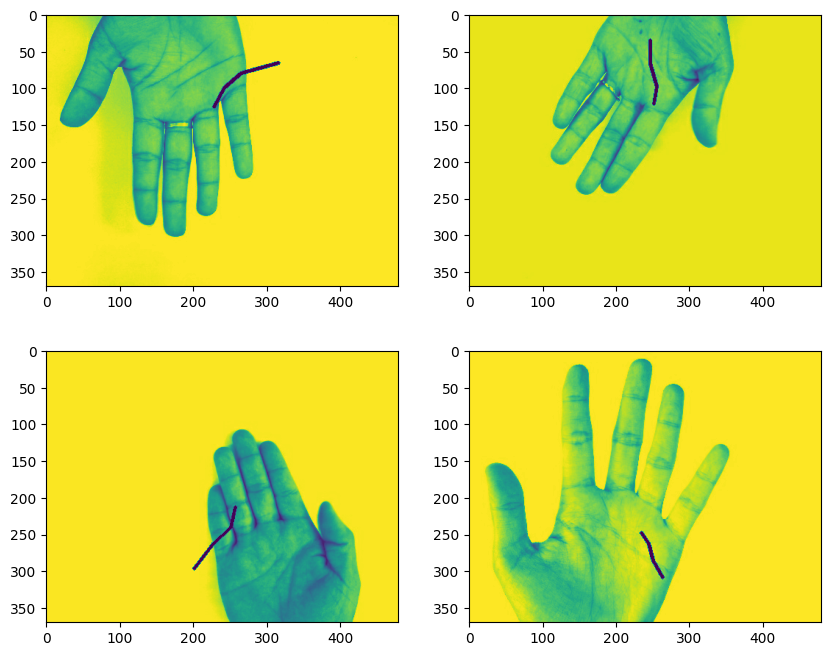

In [141]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(10, 8))
for idx in range(4):
    image = test[5][idx]
    image = np.array(image)
    
    sample_coords = y_pred[5][1][idx]
    
    coords = tf.stack([
        sample_coords[0] * 480,
        sample_coords[1] * 370,
        sample_coords[2] * 480,
        sample_coords[3] * 370,
        sample_coords[4] * 480,
        sample_coords[5] * 370,
        sample_coords[6] * 480,
        sample_coords[7] * 370
    ])
    
    lines = np.array(coords).astype(int)
    width = 3

    image = cv2.line(image, (lines[0], lines[1]), (lines[2], lines[3]), 0, width)
    image = cv2.line(image, (lines[2], lines[3]), (lines[4], lines[5]), 0, width)
    image = cv2.line(image, (lines[4], lines[5]), (lines[6], lines[7]), 0, width)
    

    ax[idx // 2, idx % 2].imshow(image)

In [158]:
a = list(test)[73]
a.shape

TensorShape([4, 370, 480, 1])

In [159]:
b = lovereader.predict(a)

1/1 [==============================] - 0s 25ms/step


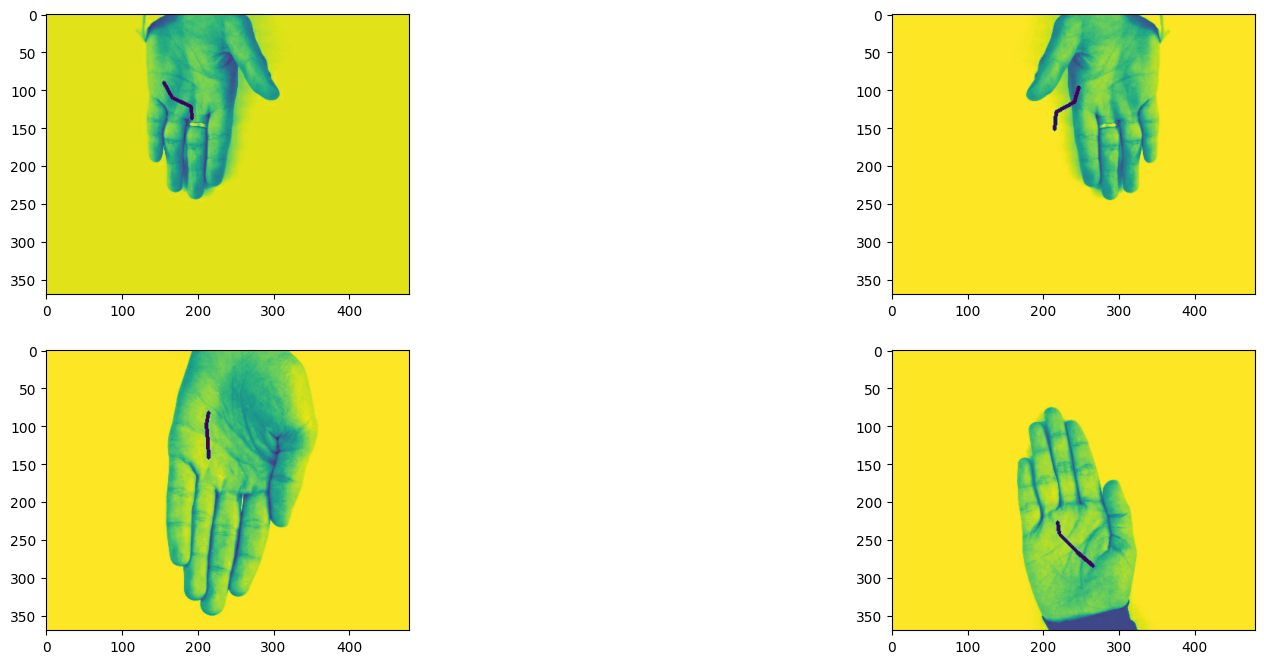

In [160]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 8))
for idx in range(4):
    image = a[idx]
    sample_coords = b[1][idx]
    image = np.array(image)
    
    coords = tf.stack([
        sample_coords[0] * 480,
        sample_coords[1] * 370,
        sample_coords[2] * 480,
        sample_coords[3] * 370,
        sample_coords[4] * 480,
        sample_coords[5] * 370,
        sample_coords[6] * 480,
        sample_coords[7] * 370
    ])
    
    lines = np.array(coords).astype(int)
    width = 3

    image = cv2.line(image, (lines[0], lines[1]), (lines[2], lines[3]), 0, width)
    image = cv2.line(image, (lines[2], lines[3]), (lines[4], lines[5]), 0, width)
    image = cv2.line(image, (lines[4], lines[5]), (lines[6], lines[7]), 0, width)
    

    ax[idx // 2, idx % 2].imshow(image)

### Make a Real Time Reader

In [4]:
from keras.models import load_model
model = load_model('Models/lovereader2.h5')

In [175]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = np.expand_dims(gray, axis=-1)
    resized = tf.image.resize(gray, (370,480))/255
    
    yhat = model.predict(np.expand_dims(resized, 0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5:
        coords = tf.stack([
            sample_coords[0] * 480,
            sample_coords[1] * 370,
            sample_coords[2] * 480,
            sample_coords[3] * 370,
            sample_coords[4] * 480,
            sample_coords[5] * 370,
            sample_coords[6] * 480,
            sample_coords[7] * 370
        ])
    
        lines = np.array(coords).astype(int)
        width = 3

        frame = cv2.line(frame, (lines[0], lines[1]), (lines[2], lines[3]), 0, width)
        frame = cv2.line(frame, (lines[2], lines[3]), (lines[4], lines[5]), 0, width)
        frame = cv2.line(frame, (lines[4], lines[5]), (lines[6], lines[7]), 0, width)
        
        
    cv2.imshow('LOVE', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 17ms/step
